In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'
%matplotlib inline

## Seamless Cloning

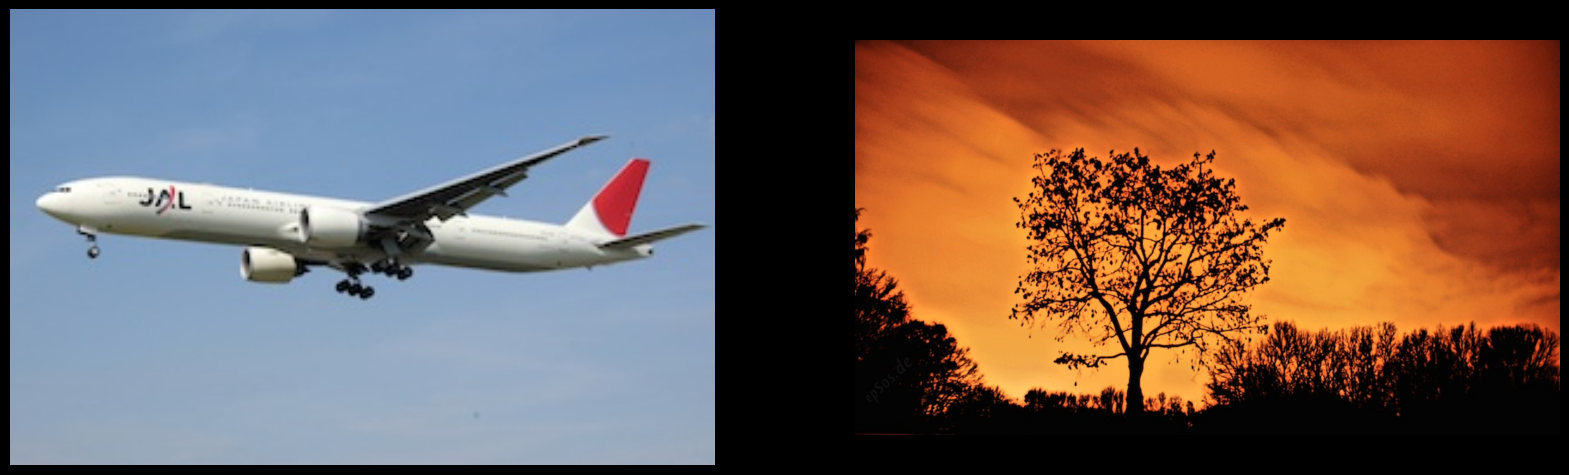

In [8]:
DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w5 - The assignment carries 30 marks and the marks distribution is as follows\data"

img1 = cv2.imread(DATA_PATH + r"\images\airplane.jpg", cv2.IMREAD_COLOR)
img2 = cv2.imread(DATA_PATH + r"\images\sky.jpg", cv2.IMREAD_COLOR)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.axis(False)
plt.imshow(img1[:, :, ::-1]);

plt.subplot(122)
plt.axis(False)
plt.imshow(img2[:, :, ::-1]);

In [25]:
src_mask = np.zeros(img1.shape, img1.dtype)
poly = np.array([ [4,80], [30,54], [151,63],
                  [254,37], [298,90], [272,134],
                  [43,122] ], np.int32)
src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))
center = (800, 100)

output = cv2.seamlessClone(img1, img2, src_mask,
                           center, cv2.NORMAL_CLONE)

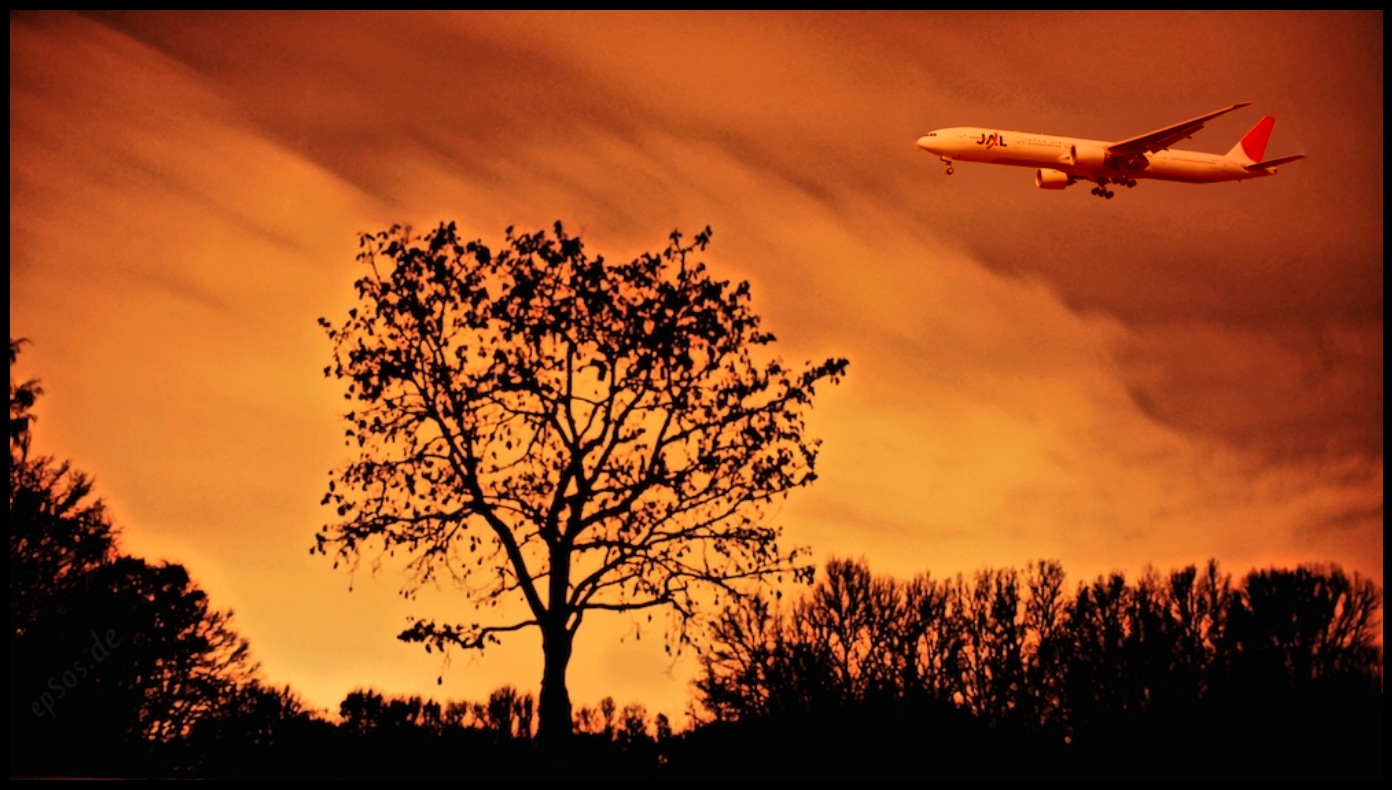

In [26]:
plt.figure(figsize=(20,10))
plt.axis(False)
plt.imshow(output[:, :, ::-1]);

## Normal or Mixed Cloning

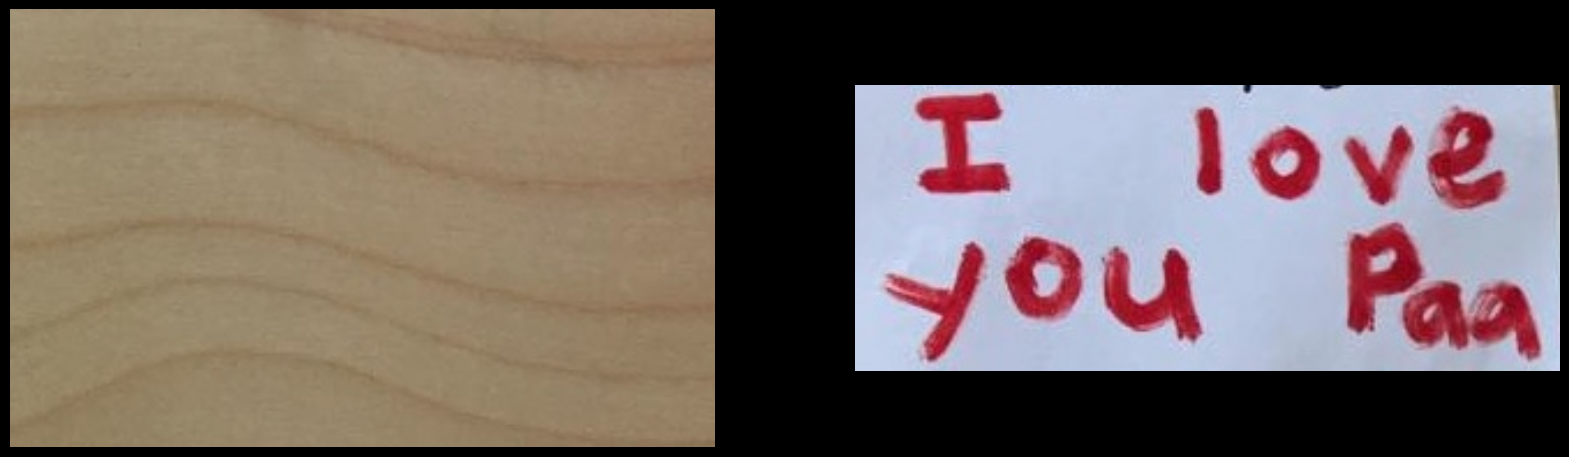

In [27]:
DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w5 - The assignment carries 30 marks and the marks distribution is as follows\data"

img1 = cv2.imread(DATA_PATH + r"\images\wood-texture.jpg", cv2.IMREAD_COLOR)
img2 = cv2.imread(DATA_PATH + r"\images\iloveyouticket.jpg", cv2.IMREAD_COLOR)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.axis(False)
plt.imshow(img1[:, :, ::-1]);

plt.subplot(122)
plt.axis(False)
plt.imshow(img2[:, :, ::-1]);

In [28]:
mask = 255 * np.ones(img2.shape, img2.dtype)
width, height, channels = img1.shape
center = (height//2, width//2)

normal_clones = cv2.seamlessClone(img2, img1, mask, center, cv2.NORMAL_CLONE)
mixed_clones = cv2.seamlessClone(img2, img1, mask, center, cv2.MIXED_CLONE)

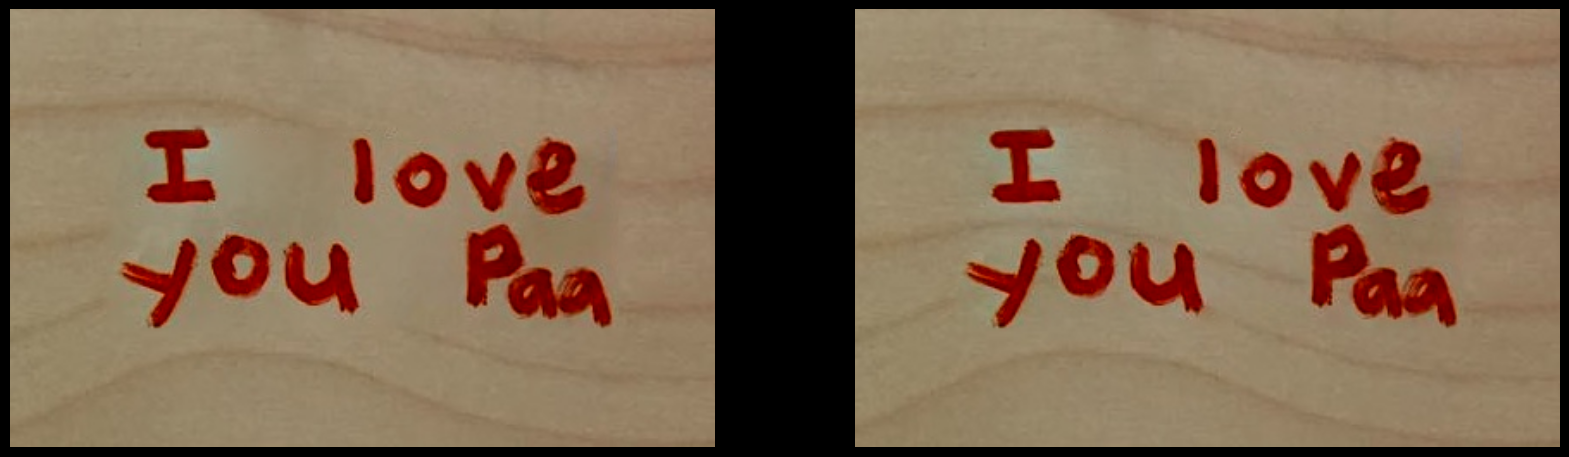

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(normal_clones[:, :, ::-1])
plt.axis(False)

plt.subplot(122)
plt.imshow(mixed_clones[:, :, ::-1])
plt.axis(False)
plt.show()

## Blend Face

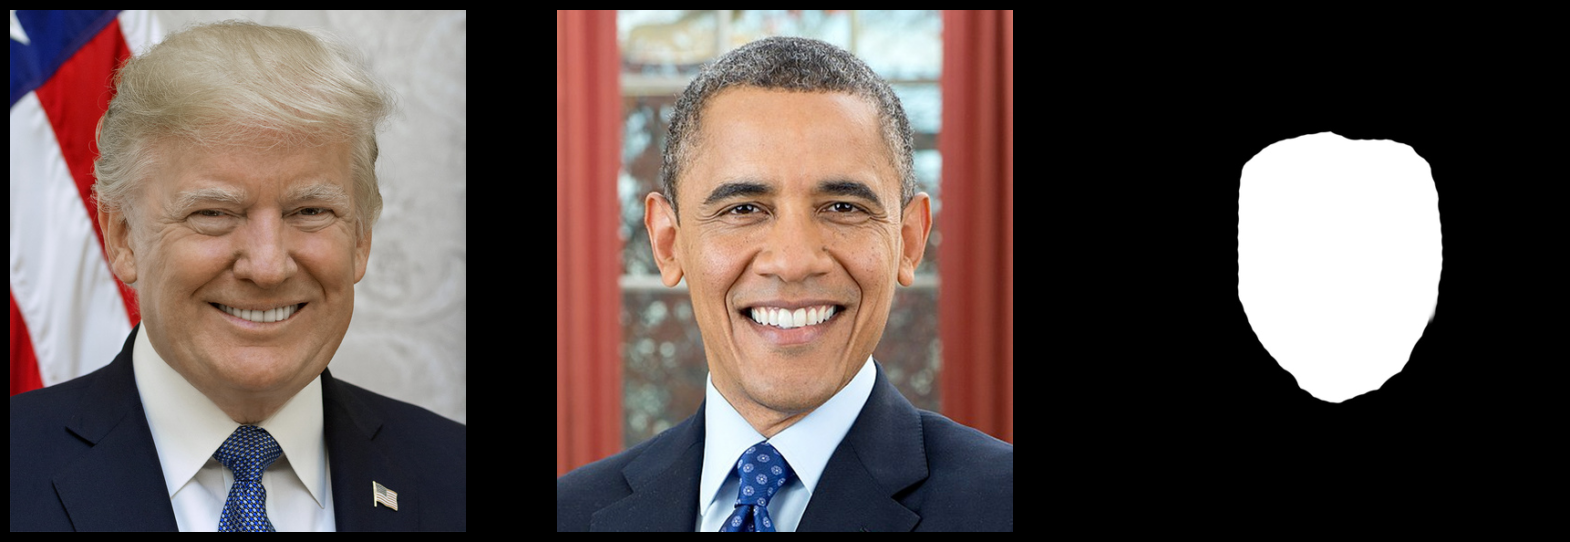

In [31]:
DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w5 - The assignment carries 30 marks and the marks distribution is as follows\data"

img1 = cv2.imread(DATA_PATH + r"\images\trump.jpg", cv2.IMREAD_COLOR)
img2 = cv2.imread(DATA_PATH + r"\images\obama.jpg", cv2.IMREAD_COLOR)
mask =  cv2.imread(DATA_PATH + r"\images\obama-mask.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.axis(False)
plt.imshow(img1[:, :, ::-1])

plt.subplot(132)
plt.axis(False)
plt.imshow(img2[:, :, ::-1])

plt.subplot(133)
plt.axis(False)
plt.imshow(mask, cmap="gray");

In [35]:
alpha = cv2.cvtColor(mask.copy(), cv2.COLOR_GRAY2RGB)
alpha = alpha.astype(np.float32)/255.0

outblend = img2 * alpha + img1 * (1 - alpha)
outblend = outblend.astype(np.uint8)

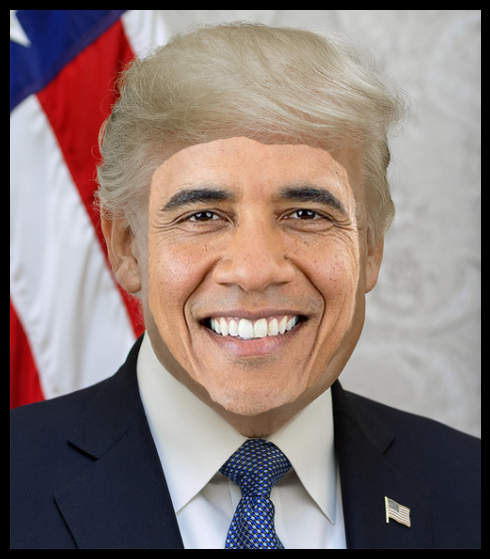

In [36]:
plt.figure(figsize=(7,7))
plt.imshow(outblend[:,:,::-1])
plt.axis(False)
plt.show()

In [37]:
ret, mask_bin = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
moments = cv2.moments(mask_bin)
center = (int(moments["m01"]/moments["m00"]), int(moments["m10"]/moments["m00"]))

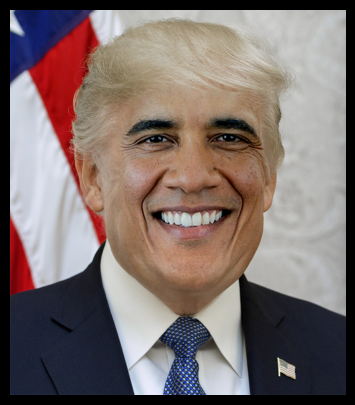

In [39]:
output_clone = cv2.seamlessClone(img2, img1, mask, center, cv2.NORMAL_CLONE)

plt.imshow(output_clone[:,:,::-1])
plt.axis(False)
plt.show()

https://www.learnopencv.com/seamless-cloning-using-opencv-python-cpp/
https://sandipanweb.wordpress.com/2017/10/03/some-variational-image-processing-possion-image-editing-and-its-applications/
http://amroamroamro.github.io/mexopencv/opencv/cloning_demo.html